In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


# Storytelling - EDA and Prediction of Student Math Scores

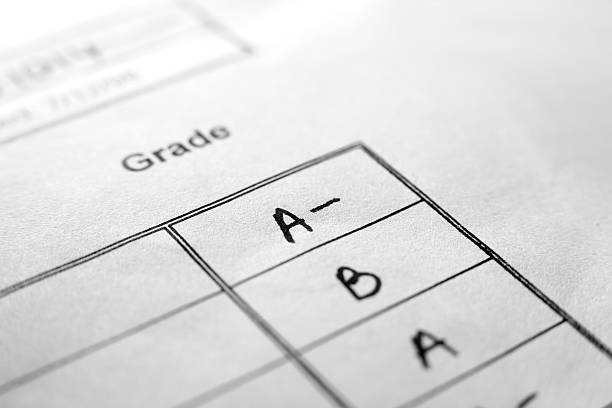

Source: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.istockphoto.com%2Fphotos%2Fgrades&psig=AOvVaw14YUKV8FRhrlijDQRb89M8&ust=1649615169092000&source=images&cd=vfe&ved=0CAoQjRxqFwoTCOjK4cXNh_cCFQAAAAAdAAAAABAD

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :'Blue'; border-radius: 100px 100px; text-align:center " >Table of Contents</h1>


* [1. Introduction](#1)
    * [1.1 Libraries And Utilities](#1.1)
    * [1.2 Data Preprocessing- loading, Missingvalues, and feature extraction](#1.2)
* [2. Storytelling With Data - Explinatory Data Analysis](#2)
    * [2.0 Distribution of targets](#2.0)
    * [2.1 Univariate analysis of continuous variables](#2.1)
    * [2.2 Overview of univariete categorical features](#2.2)
    * [2.3 Univariate analysis of categorical variables](#2.3)
    * [2.4 Relationship between two continuous variables](#2.4)
    * [2.5 Visualization of the correlations between features](#2.5)
* [3. Visualization of Data Balancing with Datasampling techniques](#3)
* [4. Modeling and results](#4)
* [5. References](#5)

# Data Extraction

In [2]:
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

# Exploratory Data Analysis (EDA)

In [3]:
# Checking the shape of the data
df.shape

(1000, 8)

In [4]:
# Checking the column's names
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
# Taking a look of general data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# Looking out for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Checking the data of data
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
# Taking a look at the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


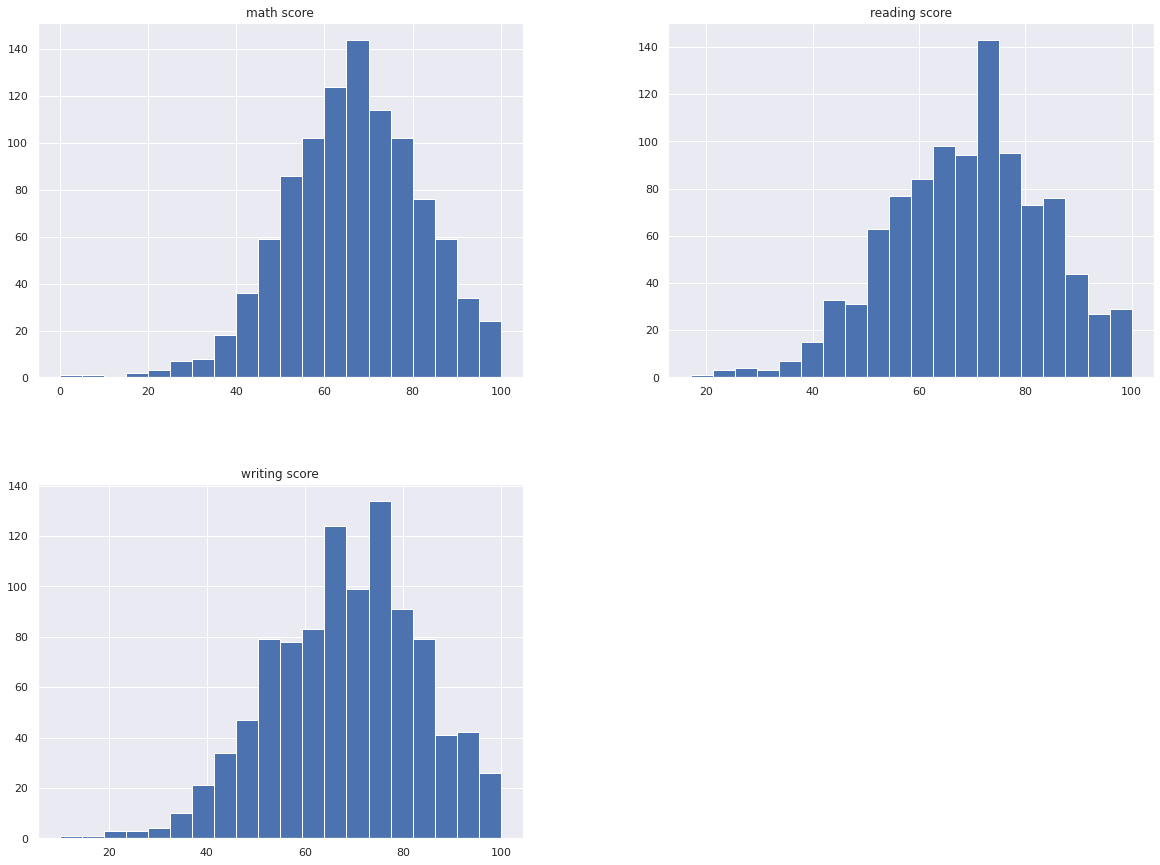

In [9]:
# Plotting a histogram of the numerical variables 
sns.set()
df.hist(bins=20, figsize=(20,15));

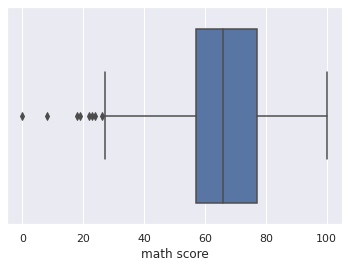

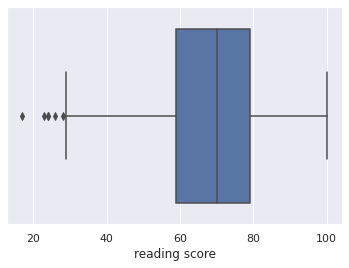

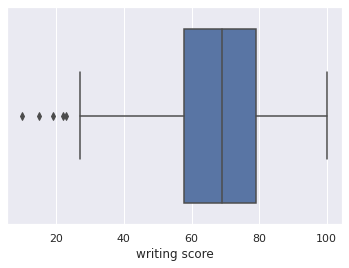

In [10]:
# Checking the boxplot looking for outliers
sns.boxplot(  x= df['math score']   , data=df,  orient='h' , )
plt.show()
sns.boxplot(  x= df['reading score'], data=df,  orient='h' , )
plt.show()
sns.boxplot(  x= df['writing score'], data=df,  orient='h' , )
plt.show()

We notice that exist some outliers but analyzing the dataset it's possible reach the conclusion we haven't any reason to discard these outliers.

**Gender Distribution**

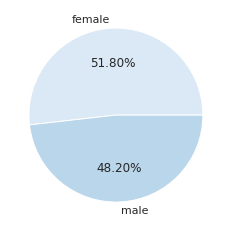

In [11]:
colors = sns.color_palette('Blues')
_ = plt.pie(df.gender.value_counts(),labels=df.gender.value_counts().index,autopct='%1.2f%%',colors=colors)

**Race Distribution**

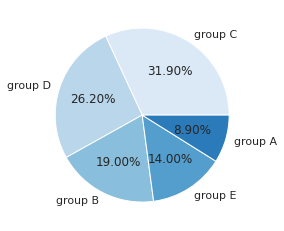

In [12]:
colors = sns.color_palette('Blues')
_ = plt.pie(df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,autopct='%1.2f%%',colors=colors)

**Parental level of education**

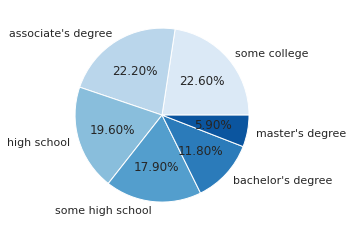

In [13]:
colors = sns.color_palette('Blues')
_ = plt.pie(df['parental level of education'].value_counts(),labels=df['parental level of education'].value_counts().index,autopct='%1.2f%%',colors=colors)

**Test preparation course**

none         642
completed    358
Name: test preparation course, dtype: int64


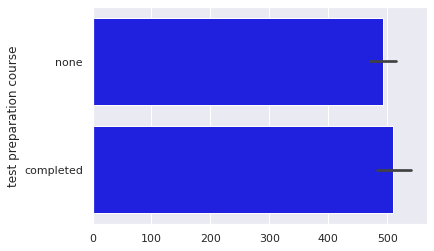

In [14]:
print(df['test preparation course'].value_counts())
_ = sns.barplot(x=df['test preparation course'].index,y=df['test preparation course'],data=df,color='blue')

**Lunch**

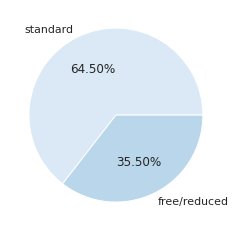

In [15]:
colors = sns.color_palette('Blues')
_ = plt.pie(df.lunch.value_counts(),labels=df.lunch.value_counts().index,autopct='%1.2f%%',colors=colors)

**Comparison between the test preparation course and the average result**

In [16]:
df['average score'] = (df['math score'] + df['reading score'] + df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [17]:
# The average score to the person that haven't any test preparation course
average_none = df[df['test preparation course'] == 'none']['average score']

# The average score to the person that have completed the test preparation course
average_completed = df[df['test preparation course'] == 'none']['average score']

averages = pd.DataFrame({'average_none':[average_none.mean()],'average_completed':[average_completed.mean()]})

# Transforming in percentual values
x = averages['average_none'] / (averages['average_none'] + averages['average_completed']) 
y = averages['average_completed'] / (averages['average_none'] + averages['average_completed']) 
averages['average_none']      = x[0]
averages['average_completed'] = y[0]

difference = (x[0]-y[0])
print("Difference between Average Score of Students that had test preparation course and the students that haven't it: ",difference)


Difference between Average Score of Students that had test preparation course and the students that haven't it:  0.0


We see that wasn't any difference at the Average Score, now let's take a look at the histogram plot aiming check the Average Score distribution for both cases (test preparation course == none | test preparation course == completed)

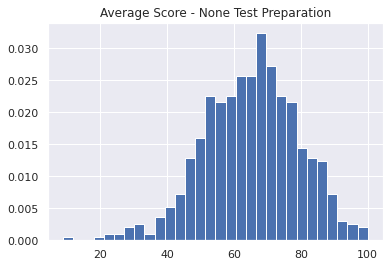

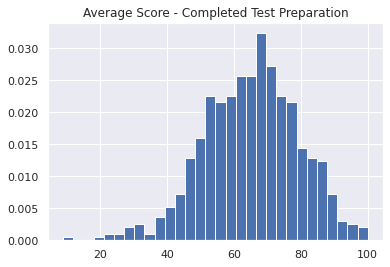

In [18]:
_ = plt.hist(average_none,bins=30,label='average_none',density=True)
plt.title('Average Score - None Test Preparation')
plt.show()
_ = plt.hist(average_completed,bins=30,label='average_completed',density=True)
plt.title('Average Score - Completed Test Preparation')
plt.show()

It's possible notice the similar distribution for both of the cases

# Pearson Correlation

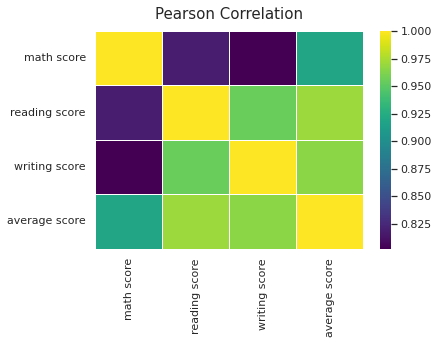

<Figure size 720x576 with 0 Axes>

In [19]:
df.corr()
#visualize correlation of each numerical variable using pearson correlation
_ = sns.heatmap(df.corr(), vmax = 1, linewidths = 0.9, cmap = 'viridis')
_ = plt.title('Pearson Correlation', fontsize = 15, pad = 12)
_ = plt.figure(figsize = (10,8))

Looking this heatmap, we can remark the high pearson's correlation value for reading score and writing score variable. It's expected, good readerds usually are good writers.

**Scatterplots**

* **Math Score       x Reading Score - Genders** 
* **Math Score       x Writing Score - Genders** 
* **Reading Score    x Writing Score - Genders**

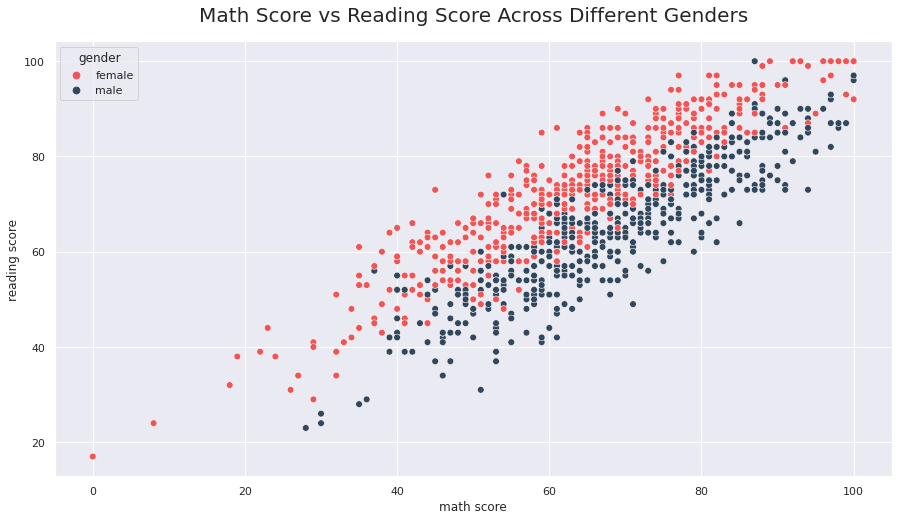

In [20]:
# Taking a subset of data (To keep things simple)
df_scatter = df[['gender','math score','reading score','writing score']]

# Visualizing the ScatterPlot
plt.figure(figsize=[15,8])


sns.scatterplot(x=df_scatter['math score'], y=df_scatter['reading score'], hue=df_scatter['gender'], 
                size=df_scatter["gender"], sizes=(45,45), 
                legend='auto',palette=['#F05454','#30475E']) 
plt.title("Math Score vs Reading Score Across Different Genders", size=20, pad=20)
plt.show()

If we fix some math score value, we notice that there's a predominance in the result in which the highest reading scores are reached by the female gender


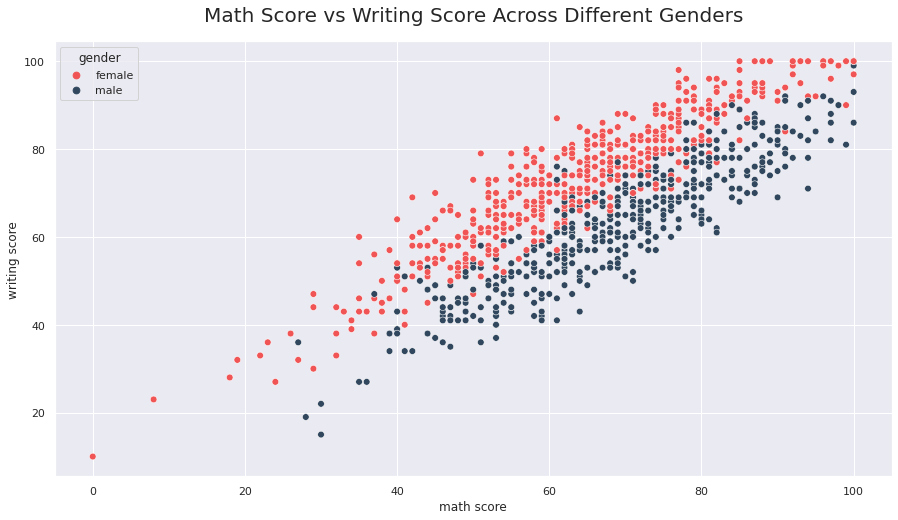

In [21]:
# Visualizing the ScatterPlot
plt.figure(figsize=[15,8])


sns.scatterplot(x=df_scatter['math score'], y=df_scatter['writing score'], hue=df_scatter['gender'], 
                size=df_scatter["gender"], sizes=(45,45), 
                legend='auto',palette=['#F05454','#30475E']) 
plt.title("Math Score vs Writing Score Across Different Genders", size=20, pad=20)
plt.show()

Again doing the same analysis, if we fix some math score value, we notice that there's a predominance in the result in which the highest writing scores are reached by the female gender

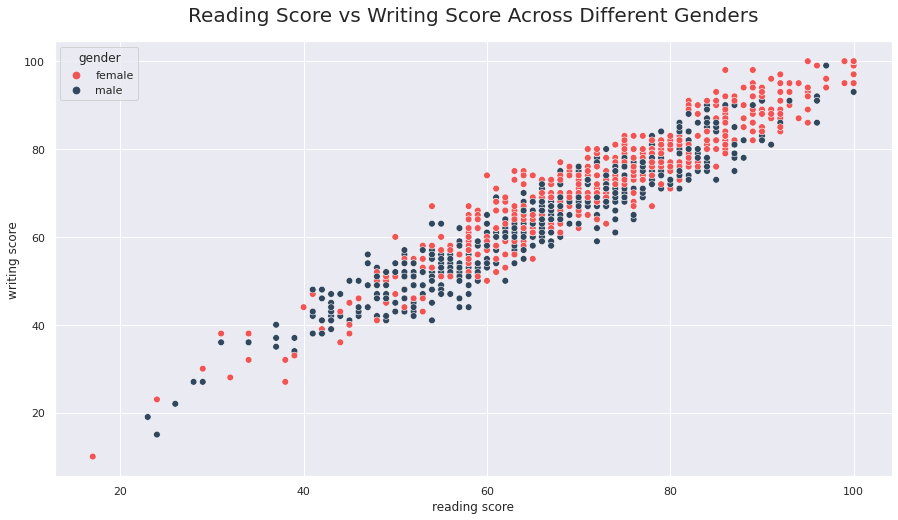

In [22]:
# Visualizing the ScatterPlot
plt.figure(figsize=[15,8])


sns.scatterplot(x=df_scatter['reading score'], y=df_scatter['writing score'], hue=df_scatter['gender'], 
                size=df_scatter["gender"], sizes=(45,45), 
                legend='auto',palette=['#F05454','#30475E']) 
plt.title("Reading Score vs Writing Score Across Different Genders", size=20, pad=20)
plt.show()

Repeting the process, if we fix some math score value, we notice that, this time, there's no predominance in the result except in the highest scores for both reading and writing scores in which we see that's more female gender than male gender

The relation mentionated above can be seen following

In [23]:
head_df = df_scatter.sort_values(by=['reading score','writing score'],ascending=False).head(10)
head_df.gender.value_counts()

female    9
male      1
Name: gender, dtype: int64

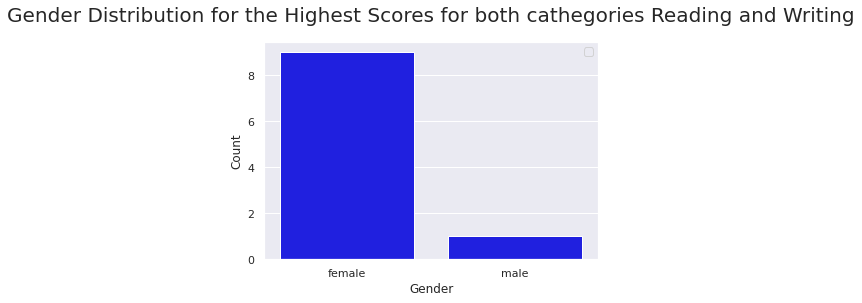

In [24]:
colors = 'blue'
_ = sns.barplot(x = head_df.gender.value_counts().index,y = head_df.gender.value_counts(),color=colors)
_ = plt.title('Gender Distribution for the Highest Scores for both cathegories Reading and Writing',size=20, pad=20)
_ = plt.xlabel('Gender')
_ = plt.ylabel('Count')
_ = plt.legend()

Then, we confirm our interpretation of the scatterplot "Reading Score vs Writing Score Across Different Genders"

# Machine Learning Models - Predict Math Score

In [25]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [26]:
# Adjusting the data
X = df.iloc[:,0:5]
y = df.iloc[:,6]
X.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [27]:
aux1 = X['parental level of education'].str.get_dummies()
aux2 = X['race/ethnicity'].str.get_dummies()
aux1.head()

,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0


In [28]:
aux = X
aux.replace({'male':1,'female':0,'standard':1,'free/reduced':0,'completed':1,'none':0,
          "bachelor's degree":1,'some college':2,"master's degree":3,"associate's degree":4,
          'high school':5,'some high school':6,'standard':1,'free/reduced':0},inplace=True)
X.drop(columns = ['parental level of education','race/ethnicity'],inplace=True)
X = pd.concat([X,aux1,aux2],axis=1)
X.head()

,gender,lunch,test preparation course,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,group A,group B,group C,group D,group E
0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,0,1,0,0


# Ridge regression in scikit-learn

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
y_pred = ridge_pred
accuracy = ridge.score(X_test, y_test)

print("Ridge's Method Accuracy: ",100*accuracy, "%")

# Evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print 'rmse_test'
print('Test set RMSE: {:.2f}'.format(rmse_test))

Ridge's Method Accuracy:  21.40825695415083 %
Test set RMSE: 13.70


# Lasso regression in scikit-learn

In [30]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)
y_pred = lasso_pred
accuracy = lasso.score(X_test, y_test)

print("Lasso's Method Accuracy: ",100*accuracy, "%")

# Evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print 'rmse_test'
print('Test set RMSE: {:.2f}'.format(rmse_test))

Lasso's Method Accuracy:  8.885409326800897 %
Test set RMSE: 14.76


# Regression-Tree in scikit-learn

In [31]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=3)
# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=3)

# Fit 'dt' to the training-set
dt.fit(X_train, y_train)
# Predict test-set labels
y_pred = dt.predict(X_test)

# Compute test-set MSE
mse_dt = MSE(y_test, y_pred)
# Compute test-set RMSE
rmse_dt = mse_dt**(1/2)

dt.score(X_test, y_test)

accuracy = dt.score(X_test, y_test)

print("Regression-Tree's Method Accuracy: ",100*accuracy, "%")

# Evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print 'rmse_test'
print('Test set RMSE: {:.2f}'.format(rmse_test))

Regression-Tree's Method Accuracy:  15.805575413373141 %
Test set RMSE: 13.20


# Random Forests Regressor in sklearn


In [32]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3,
random_state=SEED)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=200,min_samples_leaf=0.12,random_state=SEED)
# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

rf.score(X_test, y_test)

accuracy = rf.score(X_test, y_test)

print("Random Forests Regressor's Method Accuracy: ",100*accuracy, "%")

# Evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print 'rmse_test'
print('Test set RMSE: {:.2f}'.format(rmse_test))

Random Forests Regressor's Method Accuracy:  11.039544742148378 %
Test set RMSE: 13.73


# Gradient Boosting in sklearn

In [33]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)

# Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)
# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)
# Predict the test set labels
y_pred = gbt.predict(X_test)

gbt.score(X_test, y_test)

accuracy = gbt.score(X_test, y_test)

print("Gradient Boosting's Method Accuracy: ",100*accuracy, "%")

# Evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print 'rmse_test'
print('Test set RMSE: {:.2f}'.format(rmse_test))

Gradient Boosting's Method Accuracy:  21.439962812629688 %
Test set RMSE: 12.90


# Stochastic Gradient Boosting in sklearn

In [34]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)

# Instantiate a stochastic GradientBoostingRegressor 'sgbt'
sgbt = GradientBoostingRegressor(max_depth=1,
subsample=0.8,
max_features=0.2,
n_estimators=300,
random_state=SEED)
# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)
# Predict the test set labels
y_pred = sgbt.predict(X_test)

sgbt.score(X_test, y_test)

accuracy = sgbt.score(X_test, y_test)

print("Gradient Boosting's Method Accuracy: ",100*accuracy, "%")

# Evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print 'rmse_test'
print('Test set RMSE: {:.2f}'.format(rmse_test))

Gradient Boosting's Method Accuracy:  21.182401752976975 %
Test set RMSE: 12.92


# XGBoost

In [35]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(colsample_bytree = 0.2, learning_rate = 0.2,max_depth = 7, alpha = 5, 
                          n_estimators = 200)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

xg_reg.score(X_test, y_test)

accuracy = xg_reg.score(X_test, y_test)

print("Gradient Boosting's Method Accuracy: ",100*accuracy, "%")

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

Gradient Boosting's Method Accuracy:  20.919030731030986 %
RMSE: 12.944145
